# 시각화 기법

## x축 tick label 다루기

시계열 그래프는 x축 시간을 설정 > 변화하는 변수를 설정하는 차트

- 시계열 그래프의 x축 라벨 설정
- 데이터셋 : ABNB_stock.csv

In [12]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df_abnb = pd.read_csv(
  './data/ABNB_stock.csv'
)
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


<Axes: xlabel='Date', ylabel='Close'>

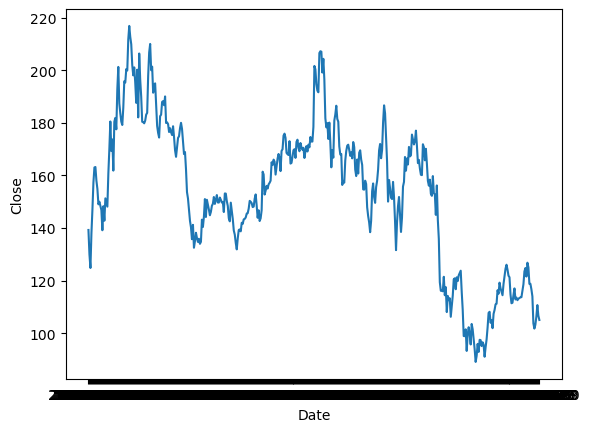

In [8]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

In [ ]:
# datetime type으로 변환
df_abnb['Date'] = pd.to_datetime(df_abnb['Date'])
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       454 non-null    datetime64[ns]
 1   Open       454 non-null    float64       
 2   High       454 non-null    float64       
 3   Low        454 non-null    float64       
 4   Close      454 non-null    float64       
 5   Adj Close  454 non-null    float64       
 6   Volume     454 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 25.0 KB


<Axes: xlabel='Date', ylabel='Close'>

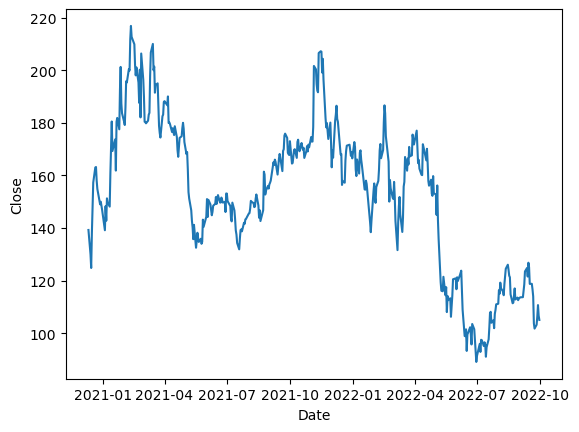

In [10]:
fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)

In [ ]:
# 축레벨 회전, 표현방식을 변경 > fomatter 를 사용

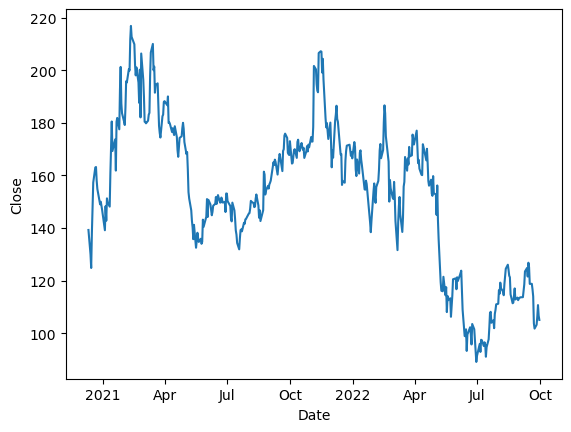

In [11]:
import matplotlib as mpl

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [ ]:
# plotly line
px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)

In [14]:
fig = px.line(data_frame=df_abnb, x='Date', y='Close', width=500, height=400)
fig.update_xaxes(tickformat='%Y-%m-%d')

# 다중 축 차트

기본 차트 x,y + y1, y2 -> 하나의 ax에 그리기

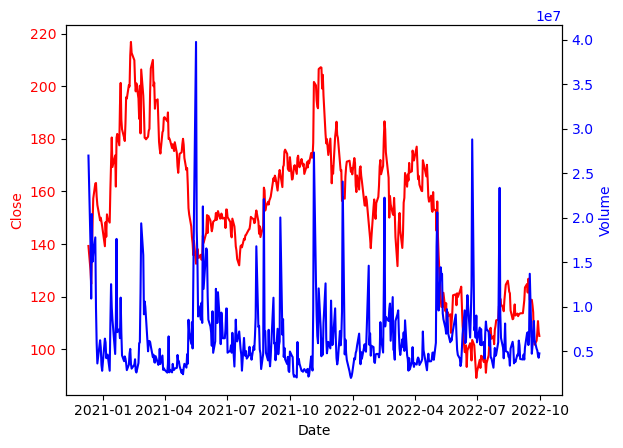

In [ ]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

sns.lineplot(x='Date', y='Close', data=df_abnb, ax=ax, color='red')
sns.lineplot(x='Date', y='Volume', data=df_abnb, ax=ax2, color='blue')

#왼쪽y축 정보 설정
ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')
#오른쪽y축
ax2.tick_params(axis='y', labelcolor='blue')
ax2.yaxis.label.set_color('blue')

#x축 날짜 포맷 지정하기


In [21]:
df_abnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [ ]:
# 3개 축
# 최고가 - 최저가 = High_Low 변수 추가
df_abnb['High-Low'] = df_abnb['High']-df_abnb['Low']
df_abnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High-Low
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,16.399994
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,10.139999
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,6.099998
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,17.089996
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,9.779999


<Axes: xlabel='Date', ylabel='High-Low'>

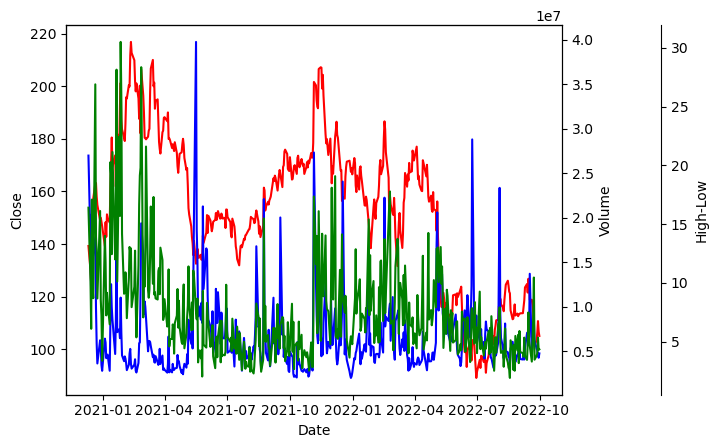

In [24]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
ax3 =ax.twinx()

ax3.spines.right.set_position(('axes', 1.2)) #현재축 위치 1에서 0.2만 큼 오른쪽으로 이동

sns.lineplot(x="Date", y="Close", data=df_abnb, ax=ax, color='red')
sns.lineplot(x="Date", y="Volume", data=df_abnb, ax=ax2, color='blue')
sns.lineplot(x="Date", y="High-Low", data=df_abnb, ax=ax3, color='green')


In [ ]:
#plotly 로 2중축 차트
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y":True}]]) #2dimension list로 spec지정

#축설정
sub_fig_1 = px.line(df_abnb, x='Date', y='Close')
sub_fig_1.update_traces(line_color='red')
sub_fig_2 = px.line(df_abnb, x='Date', y='Volume')
sub_fig_2.update_traces(line_color='blue')
sub_fig_2.update_traces(yaxis='y2')

#2개의 차트 합치기
fig.add_traces(sub_fig_1.data + sub_fig_2.data)

#레이블설정
fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Close'
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.title = 'Volume'
fig.layout.yaxis2.color = 'blue'

fig.update_layout(width=500, height=400)


# plotly.graph_object 로 그리기
# plotly.express 로 그리기

In [39]:
#graph_object 3개 축 그리기
import plotly.graph_objects as go

fig = make_subplots()
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
    mode='lines', yaxis='y', line={'color':'red'}
    ) #1번째 축
)
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
    mode='lines', yaxis='y2', line={'color':'blue'}
    ) #2번째 축 Volume
)
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['High-Low'], name='High-Low',
    mode='lines', yaxis='y3', line={'color':'green'}
    ) #3번째 축 High-Low
)
fig.update_layout(
  yaxis = dict(title='Close'),
  yaxis2 = dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
  yaxis3 = dict(title='High-Low', side='right', anchor='x', overlaying='y'),
  xaxis = dict(title='Date', domain=[.1, .85]),
  width=600, height=400
)
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()


# 범례 위치 조정하기

In [40]:
df_co2 = pd.read_csv(
  './data/CO2_emissions.csv'
)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

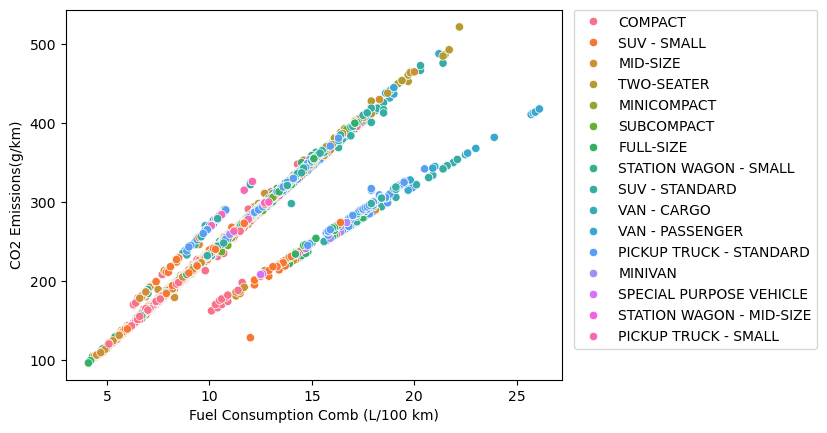

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(
  x='Fuel Consumption Comb (L/100 km)',
  y='CO2 Emissions(g/km)',
  data=df_co2, hue='Vehicle Class',
  ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) #왼쪽 하단 0.0, 오른쪽 상단 1.1

In [45]:
#plotly scatter
fig = px.scatter(
  data_frame=df_co2, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', color='Vehicle Class', width=800, height=600
)
fig.update_layout(legend_x=1.2, legend_y=1)

# 강조하기 
테두리 색, 굵기 조정

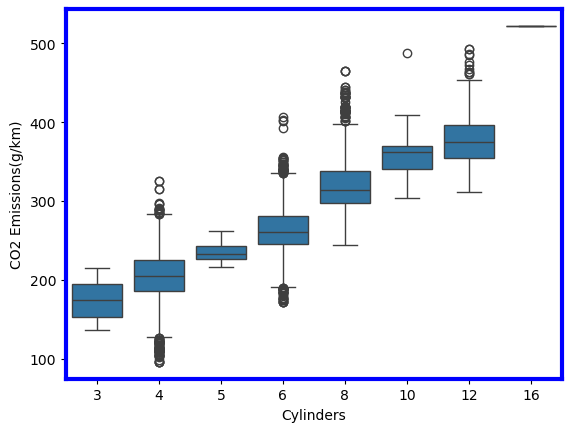

In [48]:
fig, ax = plt.subplots()

sns.boxplot(
  x='Cylinders', y='CO2 Emissions(g/km)',
  data=df_co2, ax=ax
)
spines = ['left', 'right', 'top', 'bottom']
for spin in spines:
  ax.spines[spin].set_color('blue')
  ax.spines[spin].set_linewidth(3)

In [50]:
# plotly 테두리 강조하기
fig = px.box(df_co2, x='Cylinders', y='CO2 Emissions(g/km)', width=500, height=400)
fig.update_xaxes(showline=True, linecolor='black', linewidth=3, mirror=True) #MIRROR 인자 같이 지정
fig.update_yaxes(showline=True, linecolor='black', linewidth=3, mirror=True)
fig.show()

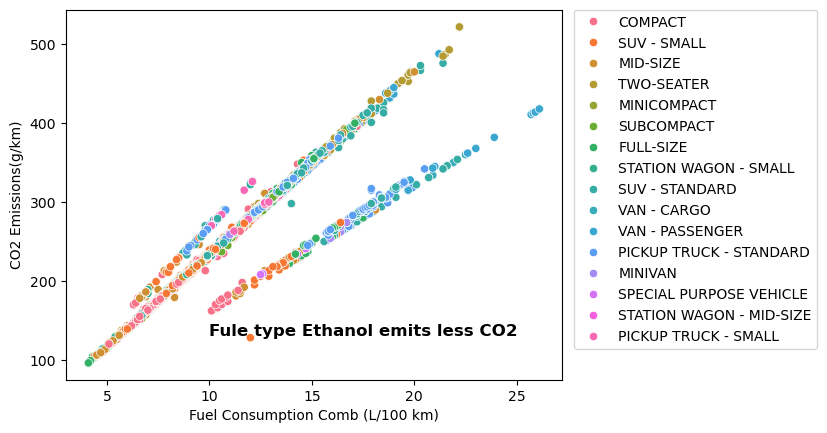

In [ ]:
# 텍스트, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
  x='Fuel Consumption Comb (L/100 km)',
  y='CO2 Emissions(g/km)',
  data=df_co2, hue='Vehicle Class',
  ax=ax
)
ax.text(
  x=10, y=130, #절대좌표
  s='Fule type Ethanol emits less CO2',
  fontdict={'fontsize':12, 'weight':'bold'}
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) #왼쪽 하단 0.0, 오른쪽 상단 1.1

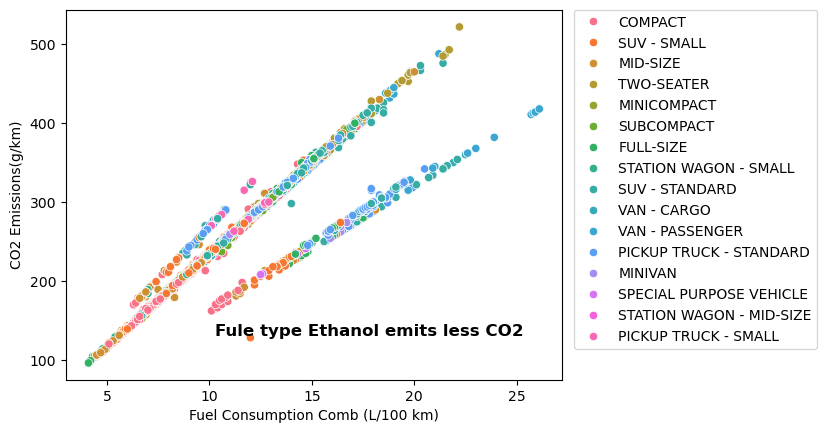

In [56]:
# 텍스트, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
  x='Fuel Consumption Comb (L/100 km)',
  y='CO2 Emissions(g/km)',
  data=df_co2, hue='Vehicle Class',
  ax=ax
)
ax.text(
  x=0.3, y=0.12, #상대좌표
  s='Fule type Ethanol emits less CO2',
  fontdict={'fontsize':12, 'weight':'bold'},
  transform=ax.transAxes #상대좌표를 전달
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) #왼쪽 하단 0.0, 오른쪽 상단 1.1

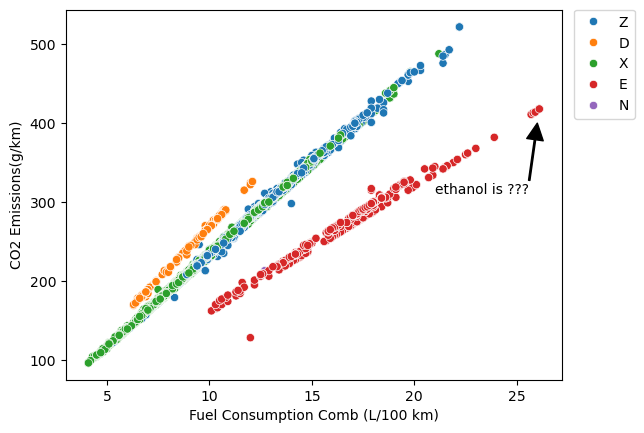

In [62]:
#  annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
  x='Fuel Consumption Comb (L/100 km)',
  y='CO2 Emissions(g/km)',
  data=df_co2, hue='Fuel Type',
  ax=ax
)
ax.annotate(
  xy=(26,400), #화살표의 절대좌표
  text='ethanol is ???',
  xytext=(21,310), #텍스트의 좌표
  arrowprops={'color':'black', 'width':1},
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) #왼쪽 하단 0.0, 오른쪽 상단 1.1

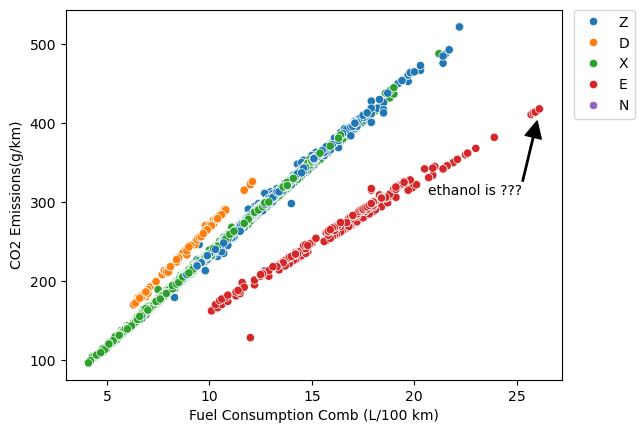

In [64]:
#  annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
  x='Fuel Consumption Comb (L/100 km)',
  y='CO2 Emissions(g/km)',
  data=df_co2, hue='Fuel Type',
  ax=ax
)
ax.annotate(
  xy=(0.95,0.7), #화살표의 상대좌표
  text='ethanol is ???',
  xytext=(0.73,0.5), #텍스트의 상대좌표
  arrowprops={'color':'black', 'width':1},
  xycoords=ax.transAxes #상대좌표
)
ax.legend(bbox_to_anchor=(1.01, 1.02)) #왼쪽 하단 0.0, 오른쪽 상단 1.1

In [ ]:
#plotly scatter
fig = px.scatter(
  data_frame=df_co2, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', color='Fuel Type', width=800, height=600
)
fig.update_layout(legend_x=1.2, legend_y=1)

fig.add_annotation(
  #x=20, y=130,
  x=0.9, y=0.75, #상대좌표
  text='<b>fuel type ethanol emits less CO2</b>',
  yref = 'y domain', xref='x domain',
  showarrow=True, arrowhead=2
)
fig.show()

# 조건을 이용한 강조하기

# 기하급수적으로 커지는 y축값을 변환해서 표현

# 색상 선택하기